In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
ci = pd.read_csv("Census Income.csv")
#importing the train and test file

# Exploratory Data Analysis

In [3]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
ci.isnull().sum(), ci.isna().sum() 

(Age               0
 Workclass         0
 Fnlwgt            0
 Education         0
 Education_num     0
 Marital_status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Capital_gain      0
 Capital_loss      0
 Hours_per_week    0
 Native_country    0
 Income            0
 dtype: int64,
 Age               0
 Workclass         0
 Fnlwgt            0
 Education         0
 Education_num     0
 Marital_status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Capital_gain      0
 Capital_loss      0
 Hours_per_week    0
 Native_country    0
 Income            0
 dtype: int64)

We can see that there are no null values

In [5]:
ci['Workclass'].unique(), ci['Occupation'].unique(), ci['Native_country'].unique()

(array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
        ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
        ' Trinada

In [6]:
ci['Workclass'].value_counts(), ci['Occupation'].value_counts(), ci['Native_country'].value_counts()

( Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  ?                    1836
  State-gov            1297
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: Workclass, dtype: int64,
  Prof-specialty       4140
  Craft-repair         4099
  Exec-managerial      4066
  Adm-clerical         3769
  Sales                3650
  Other-service        3295
  Machine-op-inspct    2002
  ?                    1843
  Transport-moving     1597
  Handlers-cleaners    1370
  Farming-fishing       994
  Tech-support          928
  Protective-serv       649
  Priv-house-serv       149
  Armed-Forces            9
 Name: Occupation, dtype: int64,
  United-States                 29169
  Mexico                          643
  ?                               583
  Philippines                     198
  Germany                         137
  Canada                          121
  Puerto-Rico                     1

We can see that there are many '?' values in 'Workclass', 'Occupation', and 'Native-country'. Therefore we can replace them by 'not known'

In [7]:
ci = ci.replace([' ?'],'not known')


In [8]:
ci.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
not known             1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


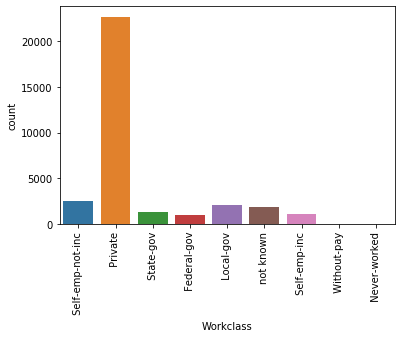

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


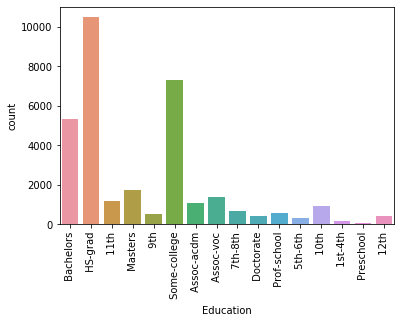

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


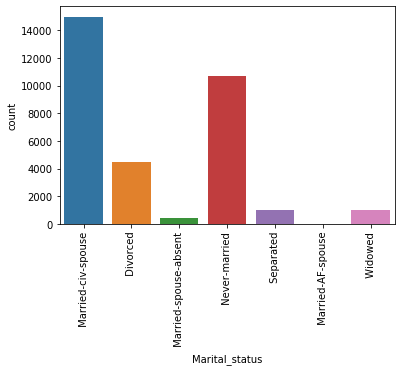

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
not known             1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


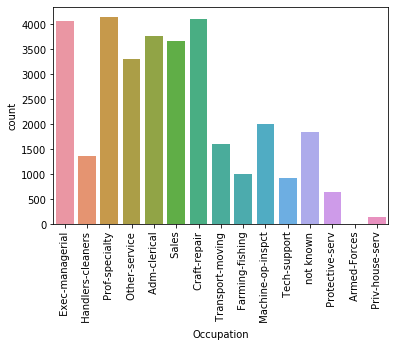

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


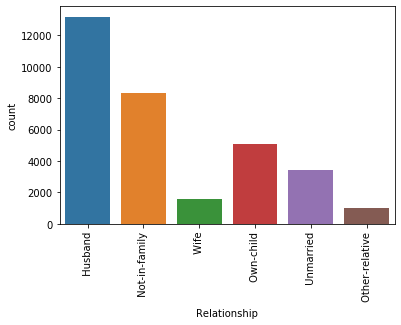

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


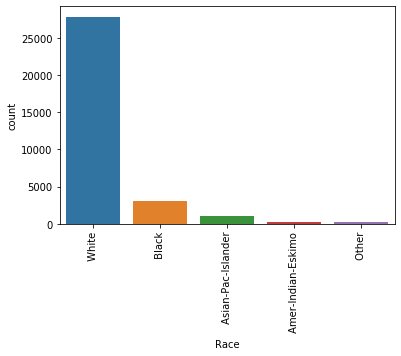

 Male      21789
 Female    10771
Name: Sex, dtype: int64


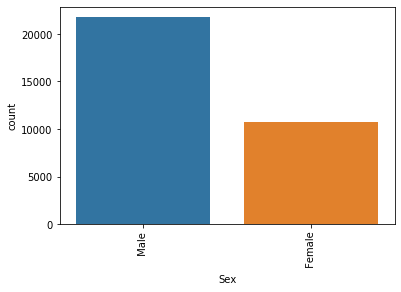

 United-States                 29169
 Mexico                          643
not known                        583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

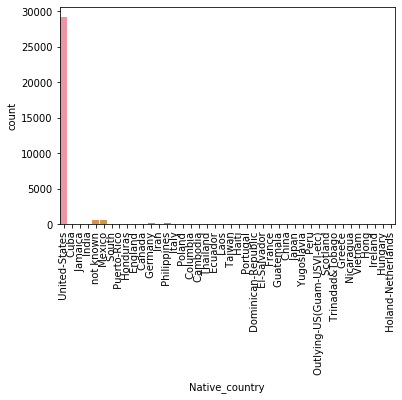

In [9]:
for i in ci[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]:
    print(ci[i].value_counts())
    sns.countplot(i, data=ci)
    plt.xticks(rotation=90)
    plt.show()

Above is the bar chart representation of Distribution of 'Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country'

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


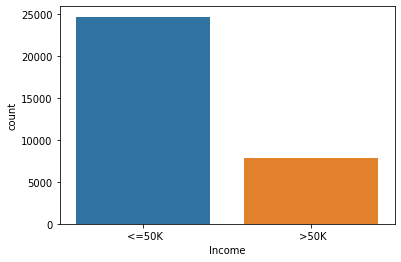

In [10]:
print(ci['Income'].value_counts())
sns.countplot('Income', data=ci)
plt.show()


we can see that more than 75% of people's income is <=50k and less than 25% of the people's income is >50k

In [11]:
ci['Workclass'].unique(), ci['Occupation'].unique(), ci['Native_country'].unique()

(array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
        ' Local-gov', 'not known', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
        ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', 'not known', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 array([' United-States', ' Cuba', ' Jamaica', ' India', 'not known',
        ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
        ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
        ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
        ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotlan

In [12]:
ci['Workclass'] = ci['Workclass'].str.strip()
ci['Education'] = ci['Education'].str.strip()
ci['Marital_status'] = ci['Marital_status'].str.strip()
ci['Occupation'] = ci['Occupation'].str.strip()
ci['Relationship'] = ci['Relationship'].str.strip()
ci['Race'] = ci['Race'].str.strip()
ci['Sex'] = ci['Sex'].str.strip()
ci['Native_country'] = ci['Native_country'].str.strip()
ci['Income'] = ci['Income'].str.strip()
# removing any empty spaces

In [13]:
ci['Workclass'].unique(), ci['Occupation'].unique(), ci['Native_country'].unique() #Cross-checking

(array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', 'not known', 'Self-emp-inc', 'Without-pay',
        'Never-worked'], dtype=object),
 array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
        'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', 'not known', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 array(['United-States', 'Cuba', 'Jamaica', 'India', 'not known', 'Mexico',
        'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
        'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
        'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
        'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
        'China', 'Japan', 'Yugoslavia', 'Peru',
        'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
        'Greece', 'Nicaragua', '

# Label Encoding
Converting Categorical variables to numerical

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
ci['Workclass']=label.fit_transform(ci['Workclass'])
ci['Education']=label.fit_transform(ci['Education'])
ci['Marital_status']=label.fit_transform(ci['Marital_status'])
ci['Occupation']=label.fit_transform(ci['Occupation'])
ci['Relationship']=label.fit_transform(ci['Relationship'])
ci['Race']=label.fit_transform(ci['Race'])
ci['Sex']=label.fit_transform(ci['Sex'])
ci['Native_country']=label.fit_transform(ci['Native_country'])
ci['Income']=label.fit_transform(ci['Income'])

In [15]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [16]:
ci.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.076646,-0.010508,0.036527,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019111,-0.019358,-0.054412,0.042191,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Fnlwgt,-0.076646,-0.019111,1.000000,-0.028156,-0.043159,0.028184,-0.000569,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.062703,-0.009481
Education,-0.010508,-0.019358,-0.028156,1.000000,0.359172,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.075189,0.079311
Education_num,0.036527,-0.054412,-0.043159,0.359172,1.000000,-0.069338,0.044150,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090270,0.335182
Marital_status,-0.266292,0.042191,0.028184,-0.038398,-0.069338,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.000569,-0.046460,0.044150,0.052891,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.008922,-0.010879,-0.094145,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.021278,0.014135,0.031825,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.026882,-0.027349,0.012256,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995


In [17]:
ci.corr()["Income"].sort_values(ascending=False) 
#identifying important features with target varible

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Race              0.071853
Native_country    0.023159
Occupation        0.010777
Fnlwgt           -0.009481
Workclass        -0.055098
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

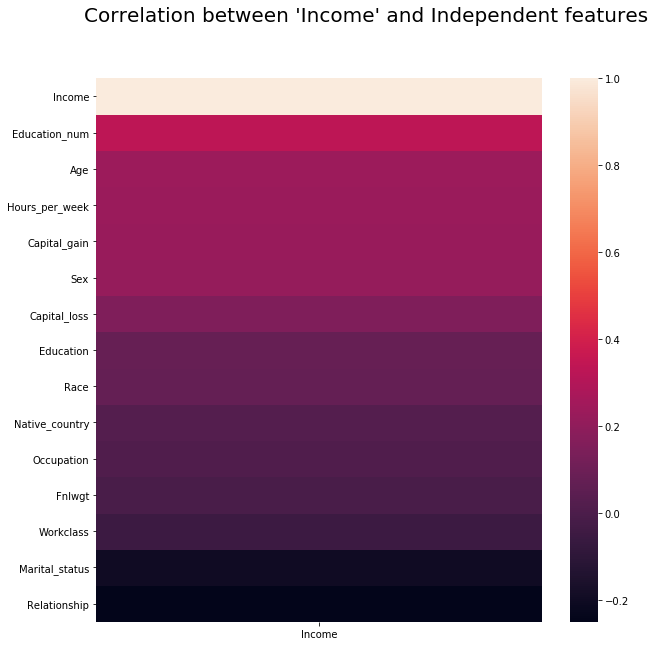

In [19]:
corr, b = plt.subplots(figsize=(10,10))
corr.suptitle("Correlation between 'Income' and Independent features",fontsize=20)
b=sns.heatmap(ci.corr()[["Income"]].sort_values("Income"));
b.invert_yaxis()

we can see that 'Fnlwgt' as the least impact on 'Income', therefore we can eliminate

In [20]:
ci.drop('Fnlwgt', axis=1,inplace=True)

In [21]:
ci.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,12,14,2,3,5,4,0,0,0,40,38,0


Standardizing all numerical features

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ci[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']]=scaler.fit_transform(ci[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']])

In [23]:
ci.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.837097,5,9,1.134779,2,3,0,4,1,-0.145914,-0.216663,-2.22212,38,0
1,-0.042640,3,11,-0.420027,0,5,1,4,1,-0.145914,-0.216663,-0.03543,38,0
2,1.057031,3,1,-1.197429,2,5,0,2,1,-0.145914,-0.216663,-0.03543,38,0
3,-0.775755,3,9,1.134779,2,9,5,2,0,-0.145914,-0.216663,-0.03543,4,0
4,-0.115952,3,12,1.523480,2,3,5,4,0,-0.145914,-0.216663,-0.03543,38,0


# Splitting of train data into Independent and Target variables

In [24]:
ind=ci.drop("Income",axis=1)
tar=ci["Income"]
#splitting individual and target variable in ind and tar

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#splitting into training and testing data set
ind_train,ind_test,tar_train,tar_test=train_test_split(ind,tar,test_size=22,random_state=43)
print(ind_train.shape)
print(ind_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(32538, 13)
(22, 13)
(32538,)
(22,)


# Data Modeling and prediciton

In [27]:
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import PowerTransformer
from  sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [28]:
# LogisticRegression, GaussianNB, Supportvectorclassifier, RandomForestClassifier, AdaBoostClassifier
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier()


In [29]:
model=[lg,gnb,sv,rf,ad,knn,dtc]

for m in model:
    m.fit(ind_train,tar_train)
    predict=m.predict(ind_test)
    print('accuracy score of:',m)
    print(accuracy_score(tar_test,predict))
    print(confusion_matrix(tar_test,predict))
    print(classification_report(tar_test,predict))
    score=cross_val_score(m,ind,tar,cv=5)
    print(score)
    print(score.mean())

accuracy score of: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.9090909090909091
[[15  1]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.83      0.83      0.83         6

    accuracy                           0.91        22
   macro avg       0.89      0.89      0.89        22
weighted avg       0.91      0.91      0.91        22

[0.82017813 0.8203317  0.83184889 0.82340295 0.82678133]
0.8245085995085996
accuracy score of: GaussianNB(priors=None, var_smoothing=1e-09)
0.8636363636363636
[[14  2]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
   

In [30]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
a=[]
acc=[]
strd=[]
classifiers=['lg','gnb','sv','rf','ad','knn','dtc']
models=[lg,gnb,sv,rf,ad,knn,dtc]
for i in models:
    model = i
    cv_result = cross_val_score(model,ind,tar, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    a.append(cv_result.mean())
    strd.append(cv_result.std())
    acc.append(cv_result)
nd=pd.DataFrame({'CV Mean':a,'Std':strd},index=classifiers)       
nd

,CV Mean,Std
lg,0.824294,0.004232
gnb,0.804085,0.005834
sv,0.811425,0.004807
rf,0.850799,0.006244
ad,0.864742,0.005436
knn,0.828900,0.005958
dtc,0.814343,0.005171


According to Cross val score and accuracy we can see that the dtc has the least difference between Accuracy and Cross val score, therefore we select DecisionTreeClassifier model.

To get the best parameters and best results we use GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy']}

gs=GridSearchCV(dtc,parameters)
gs.fit(ind_train,tar_train)

sorted(gs.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [32]:
print(gs.best_params_)
best_result=gs.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8189810009342688


We can see that the accuracy score has increased slightly. We can now save this model

In [33]:
import joblib
joblib.dump(dtc,'Census Income Project.obj') #save the model as object file


['Census Income Project.obj']